In [122]:
import os
import numpy as np
import matplotlib.pyplot as plt


# fix random seed
np.random.seed(0)
# set up inline plotting
%matplotlib inline


In [123]:
def get_points_on_ellipsoid(P, c=np.zeros(2) , n_points=100, radius=1.0):
    # Determine the inverse of the square root of the matrix P
    P_sqrt_inv = np.linalg.inv(np.sqrt(P))
    # Create a circle in the 2d space
    theta = np.linspace(0, 2 * np.pi, n_points)
    circle = radius * np.vstack((np.cos(theta), np.sin(theta)))
    # circle =  np.vstack((np.cos(theta), np.sin(theta)))
    # Scale the circle with the inverse of the square root of P
    # print(circle)
    # print('max circle[0,:]', np.max(circle[0,:]))
    # print('max circle[1,:]', np.max(circle[1,:]))
    ellipse = P_sqrt_inv @ circle
    # Translate the ellipse to the center c
    ellipse = ellipse + c.reshape(-1, 1)
    return ellipse

In [124]:

P = np.array([1, 0.5, 0.5, 1]).reshape(2, 2)
print('P:\n', P)
eigvals, _ = np.linalg.eig(P)
print('eigenvalues of P:', eigvals)

def P_ellipse(x):
        return x.T @ P @ x 

def unit_circle(x):
    return x.T @ x

# get points on the ellipse
num_points = 100
points = get_points_on_ellipsoid(P, radius=1.0)

P:
 [[1.  0.5]
 [0.5 1. ]]
eigenvalues of P: [1.5 0.5]


In [125]:
test_point_1 = np.array([0.5, 0.5])
test_point_2 = points[:,0] 
print(test_point_1.shape)
print(test_point_2.shape)
test_value_1 = test_point_1.T @ P @ test_point_1
test_value_2 = test_point_2.T @ P @ test_point_2
print(test_value_1)
print(test_value_2)
print('points\n', points)

(2,)
(2,)
0.75
3.17157287525381
points
 [[ 2.          1.90627839  1.80488086  1.69621572  1.58072051  1.4588603
   1.33112578  1.19803128  1.06011274  0.91792549  0.77204208  0.62304993
   0.47154898  0.31814927  0.16346848  0.00812946 -0.14724229 -0.30202115
  -0.45558388 -0.60731213 -0.75659495 -0.90283123 -1.04543213 -1.18382344
  -1.31744791 -1.44576748 -1.56826546 -1.68444858 -1.79384903 -1.89602628
  -1.9905689  -2.0770962  -2.15525977 -2.22474487 -2.28527171 -2.33659656
  -2.37851277 -2.41085154 -2.43348266 -2.44631501 -2.44929691 -2.44241636
  -2.42570106 -2.39921832 -2.36307477 -2.31741595 -2.26242572 -2.19832549
  -2.12537339 -2.04386316 -1.95412301 -1.8565143  -1.75143006 -1.63929343
  -1.52055594 -1.39569572 -1.26521551 -1.12964074 -0.98951729 -0.84540941
  -0.69789737 -0.54757514 -0.39504801 -0.24093017 -0.08584219  0.06959145
   0.22474487  0.37899332  0.5317157   0.68229705  0.83013103  0.97462236
   1.11518923  1.25126563  1.38230362  1.50777557  1.62717624  1.74002484

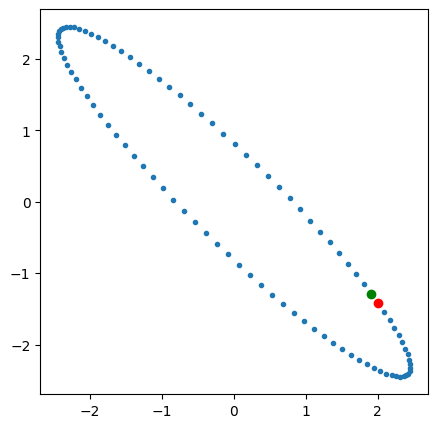

In [126]:
plt.figure(figsize=(5, 5))
plt.plot(points[0, :], points[1, :], '.')
plt.plot(points[0, 0], points[1, 0], 'ro')
plt.plot(points[0, 1], points[1, 1], 'go')

values
 [3.17157288 2.83523518 2.50430928 2.1841199  1.87981901 1.59630292
 1.33813352 1.10946484 0.91397626 0.75481324 0.6345368  0.55508221
 0.51772794 0.52307503 0.57103744 0.66084343 0.79104801 0.95955612
 1.16365641 1.40006482 1.66497747 1.95413179 2.2628752  2.5862399
 2.91902282 3.25586937 3.59135956 3.92009522 4.23678687 4.53633884
 4.8139312  5.06509741 5.2857961  5.47247615 5.6221338  5.73236101
 5.80138418 5.8280927  5.81205682 5.75353457 5.65346759 5.51346599
 5.33578245 5.12327598 4.87936587 4.60797673 4.31347531 4.00060026
 3.67438585 3.34008099 3.00306476 2.6687599  2.34254549 2.02967044
 1.73516902 1.46377988 1.21986977 1.0073633  0.82967976 0.68967816
 0.58961118 0.53108893 0.51505305 0.54176157 0.61078474 0.72101195
 0.8706696  1.05734965 1.27804834 1.52921455 1.80680691 2.10635888
 2.42305053 2.75178619 3.08727638 3.42412293 3.75690585 4.08027055
 4.38901396 4.67816828 4.94308093 5.17948934 5.38358963 5.55209774
 5.68230232 5.77210831 5.82007072 5.82541781 5.78806354

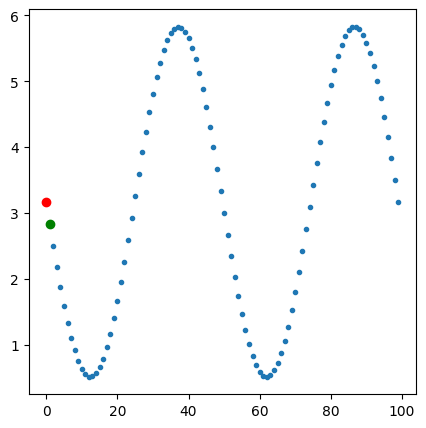

In [127]:
# values of all the points on the ellipse
values = np.zeros(num_points)
for i in range(num_points):
    values[i] = P_ellipse(points[:, i])

# plot values on the ellipse
plt.figure(figsize=(5, 5))
plt.plot(values, '.')
plt.plot(0, values[0], 'ro')
plt.plot(1, values[1], 'go')
print('values\n', values)


In [128]:
radius = 1
P_sqrt_inv = np.linalg.inv(np.sqrt(P))
# Create a circle in the 2d space
theta = np.linspace(0, 2 * np.pi, num_points)
circle = radius * np.vstack((np.cos(theta), np.sin(theta)))
ellipse = P_sqrt_inv @ circle

(-2.694213706140916, 2.6939557426988134, -2.6943751139956866, 2.69339983749077)

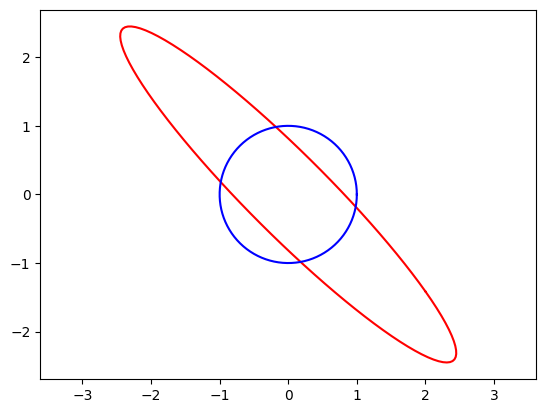

In [129]:
plt.plot(ellipse[0,:], ellipse[1,:], 'r-')
plt.plot(circle[0,:], circle[1,:], 'b-')
plt.axis('equal')

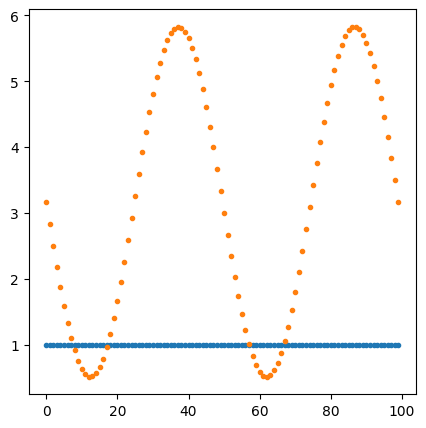

In [133]:
values_on_circle = np.zeros(num_points)
for i in range(num_points):
    values_on_circle[i] = unit_circle(circle[:, i])
plt.figure(figsize=(5, 5))
plt.plot(values_on_circle, '.')

values_on_ellipse = np.zeros(num_points)
for i in range(num_points):
    values_on_ellipse[i] = ellipse[:, i].T @ P @ ellipse[:, i]
plt.plot(values_on_ellipse, '.')